<a href="https://colab.research.google.com/github/zaman69/deep_learning_codes-_projects/blob/main/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 227MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [11]:
#generators
# for large amount of data,data is divided into small batches and processed
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
#creating CNN model
model = Sequential()
#convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



#convolution layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


#convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - accuracy: 0.5744 - loss: 2.6906 - val_accuracy: 0.6138 - val_loss: 0.6901
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6941 - loss: 0.5816 - val_accuracy: 0.7180 - val_loss: 0.5732
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7335 - loss: 0.5485 - val_accuracy: 0.7538 - val_loss: 0.4980
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.7854 - loss: 0.4544 - val_accuracy: 0.7462 - val_loss: 0.5300
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.8202 - loss: 0.3984 - val_accuracy: 0.7890 - val_loss: 0.4613
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8549 - loss: 0.3305 - val_accuracy: 0.7240 - val_loss: 0.7609
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8959 - loss: 0.2444 - val_accuracy: 0.7614 - val_loss: 0.7670
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9339 - loss: 0.1702 - 

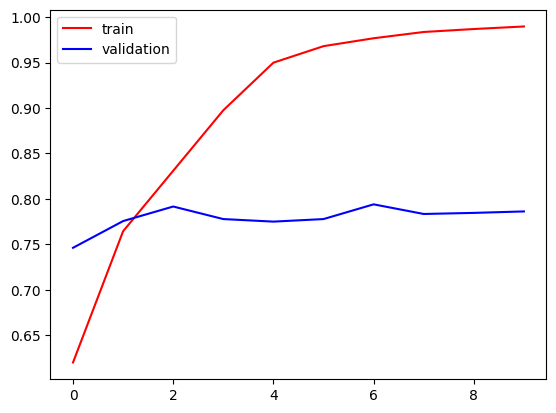

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

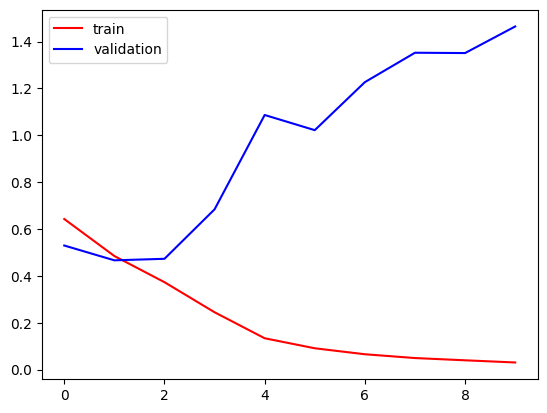

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
# ways to redce overfitting
#Adding more data
#Data Augmentation
#L1/L2 regularization
#Dropout
#Batch normalization
#Reduce complexity
#HERE ,WE WILL OBSERVE THE EFFECT OF USING BATCH NORMALIZATION AND DROPOUT EFFECT

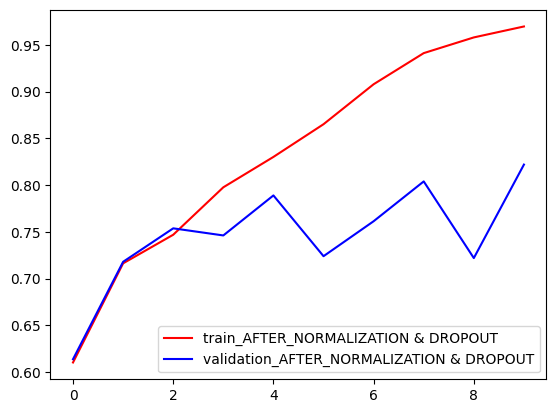

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train_AFTER_NORMALIZATION & DROPOUT')
plt.plot(history.history['val_accuracy'],color='blue',label='validation_AFTER_NORMALIZATION & DROPOUT')
plt.legend()
plt.show()

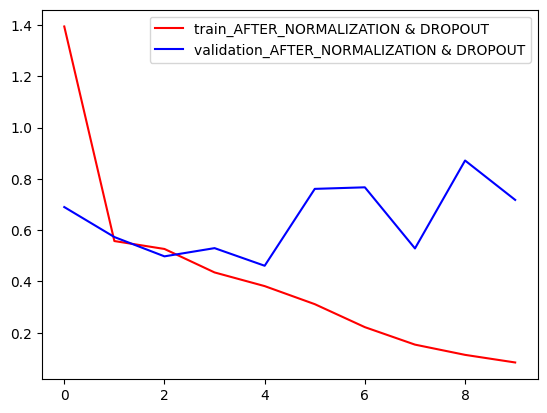

In [27]:
plt.plot(history.history['loss'],color='red',label='train_AFTER_NORMALIZATION & DROPOUT')
plt.plot(history.history['val_loss'],color='blue',label='validation_AFTER_NORMALIZATION & DROPOUT')
plt.legend()
plt.show()

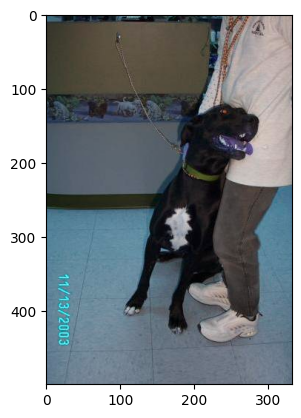

In [71]:
#LETS TEST OUR MODEL
#if 0 comes then it is clear that,our model is detecting the given image as cat,and if 1 comes then dog,cause first we have cat image foldeer
import cv2
test_img = cv2.imread('/content/train/dogs/dog.11107.jpg')
plt.imshow(test_img)
plt.show()

In [65]:
test_img.shape

(493, 500, 3)

In [72]:
test_img= cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
# 1 means one image is given

In [73]:
model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)